In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/TSLA.csv')
print("Raw Data from Yahoo Finance: ")
print(data.head())

Raw Data from Yahoo Finance: 
         Date        Open        High         Low       Close   Adj Close  \
0  2020-09-21  453.130005  455.679993  407.070007  449.390015  449.390015   
1  2020-09-22  429.600006  437.760010  417.600006  424.230011  424.230011   
2  2020-09-23  405.160004  412.149994  375.880005  380.359985  380.359985   
3  2020-09-24  363.799988  399.500000  351.299988  387.790009  387.790009   
4  2020-09-25  393.470001  408.730011  391.299988  407.339996  407.339996   

      Volume  
0  109476800  
1   79580800  
2   95074200  
3   96561100  
4   67208500  


In [3]:
data = data.drop('Date',axis = 1)
data = data.drop('Adj Close',axis = 1)
print("Data after removing Date and Adj Close: ")
print(data.head())

Data after removing Date and Adj Close: 
         Open        High         Low       Close     Volume
0  453.130005  455.679993  407.070007  449.390015  109476800
1  429.600006  437.760010  417.600006  424.230011   79580800
2  405.160004  412.149994  375.880005  380.359985   95074200
3  363.799988  399.500000  351.299988  387.790009   96561100
4  393.470001  408.730011  391.299988  407.339996   67208500


In [4]:
x = data.loc[:,data.columns != 'Close']
y = data['Close']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)
print('\n\n Training set')
print(x_train.head())
print(y_train.head())



 Training set
           Open        High         Low    Volume
4    393.470001  408.730011  391.299988  67208500
114  626.059998  627.840027  539.489990  89396500
127  667.909973  668.020020  630.109985  33795200
190  632.000000  657.200012  630.039978  31099200
239  734.080017  741.989990  731.270020  13204300
4      407.339996
114    597.950012
127    630.270020
190    656.570007
239    734.090027
Name: Close, dtype: float64


In [5]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [8]:
y_pred = regressor.predict(x_test)
print("Prediction Score: ", regressor.score(x_test,y_test))
error = mean_squared_error(y_test,y_pred)
print("Mean Squared Error: ", error)

Prediction Score:  0.9929868643102187
Mean Squared Error:  79.97767273823358


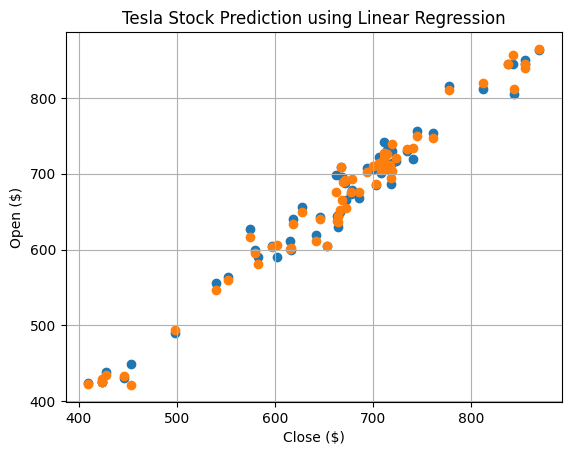

In [11]:
plt.title("Tesla Stock Prediction using Linear Regression")
plt.xlabel("Close ($)")
plt.ylabel("Open ($)")
plt.scatter(x_test["Open"],y_test)
plt.scatter(x_test["Open"],y_pred)
plt.grid()
plt.show()